In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Dental Hardness data.xlsx')
data.head(5)

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1.0,1.0,1.0,1500.0,813.0,NaN,NaN,Anova: Two-Factor Without Replication,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1600.0,792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1700.0,792.0,NaN,NaN,SUMMARY,Count,Sum,Average,Variance,NaN,NaN
3,1.0,1.0,2.0,1500.0,907.0,NaN,NaN,1,4,2315,578.75,523721.583333,NaN,NaN
4,1.0,1.0,2.0,1600.0,792.0,NaN,NaN,1,4,2394,598.5,584819,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dentist      90 non-null     float64
 1   Method       90 non-null     float64
 2   Alloy        90 non-null     float64
 3   Temp         90 non-null     float64
 4   Response     90 non-null     float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   102 non-null    object 
 8   Unnamed: 8   100 non-null    object 
 9   Unnamed: 9   100 non-null    object 
 10  Unnamed: 10  99 non-null     object 
 11  Unnamed: 11  98 non-null     object 
 12  Unnamed: 12  3 non-null      object 
 13  Unnamed: 13  3 non-null      object 
dtypes: float64(7), object(7)
memory usage: 11.8+ KB


In [4]:
data.describe()

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6
count,90.000000,90.000000,90.000000,90.000000,90.000000,0.0,0.0
mean,3.000000,2.000000,1.500000,1600.000000,741.777778,NaN,NaN
std,1.422136,0.821071,0.502801,82.107083,145.767845,NaN,NaN
min,1.000000,1.000000,1.000000,1500.000000,289.000000,NaN,NaN
25%,2.000000,1.000000,1.000000,1500.000000,698.000000,NaN,NaN
50%,3.000000,2.000000,1.500000,1600.000000,767.000000,NaN,NaN
75%,4.000000,3.000000,2.000000,1700.000000,824.000000,NaN,NaN
max,5.000000,3.000000,2.000000,1700.000000,1115.000000,NaN,NaN


In [5]:
data1 = data[data['Alloy'] != float()]['Alloy']

In [7]:
data1

0      1.0
1      1.0
2      1.0
3      2.0
4      2.0
      ... 
102    NaN
103    NaN
104    NaN
105    NaN
106    NaN
Name: Alloy, Length: 107, dtype: float64

In [8]:
data1 = np.array(data1[data1==1])
data2 = np.array(data1[data1==2])

In [10]:
data1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
data2

array([], dtype=float64)

In [16]:
from scipy import stats

#Q7.1

In [18]:
F, p_value = stats.f_oneway(data1,data2)
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:nan
Fail to reject null hypothesis


C:\Users\Dell\anaconda3\lib\site-packages\scipy\stats\stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


# Q7.2

H0 :  μ1=μ2=μ3  or The mean of the samples is the same.
H1 : At least one of them is different.

# Q7.3

## From the above result we can conclude that there is a significant change due to change in alloy of metal

In [19]:
gp1 = data[data['Dentist']==1]['Dentist']
gp2 = data[data['Dentist']==2]['Dentist']

In [20]:
gp1

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
Name: Dentist, dtype: float64

In [21]:
F, p_value = stats.f_oneway(gp1,gp2,data['Dentist'])
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:nan
Fail to reject null hypothesis


## From the above result we can conclude that there is a significant change due to change in Dentist of metal

# Q7.4

In [23]:
F, p_value = stats.f_oneway(data1,data2,data['Alloy'])
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:nan
Fail to reject null hypothesis


# No

# Q7.5

In [24]:
data['Temp'].unique()

array([1500., 1600., 1700.,   nan])

In [25]:
gs1 = data[data['Temp']==1500][['Temp','Alloy']]
gs2 = data[data['Temp']==1600][['Temp','Alloy']]

In [26]:
gs1 = gs1[gs1['Alloy']==1]
gs2 = gs2[gs2['Alloy']==2]

In [30]:
gs3 = pd.concat([gs1,gs2],axis=0) 
gs3

,Temp,Alloy
0,1500.0,1.0
6,1500.0,1.0
12,1500.0,1.0
18,1500.0,1.0
24,1500.0,1.0
30,1500.0,1.0
36,1500.0,1.0
42,1500.0,1.0
48,1500.0,1.0
54,1500.0,1.0


In [31]:
F, p_value = stats.f_oneway(gs1['Alloy'],gs2['Alloy'],gs3['Alloy'])
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.000000
Reject null hypothesis


# No

# Q7.6 

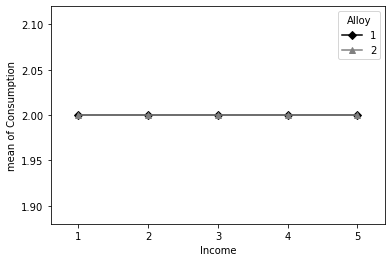

In [321]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(data['Dentist'], data['Alloy'],data['Method'],
             colors=['black','gray'], markers=['D','^'], ylabel='Consumption', xlabel='Income')

# Q7.7

# Not possible